
그래프 저장: C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\LSTM_t_to_t1_performance.png


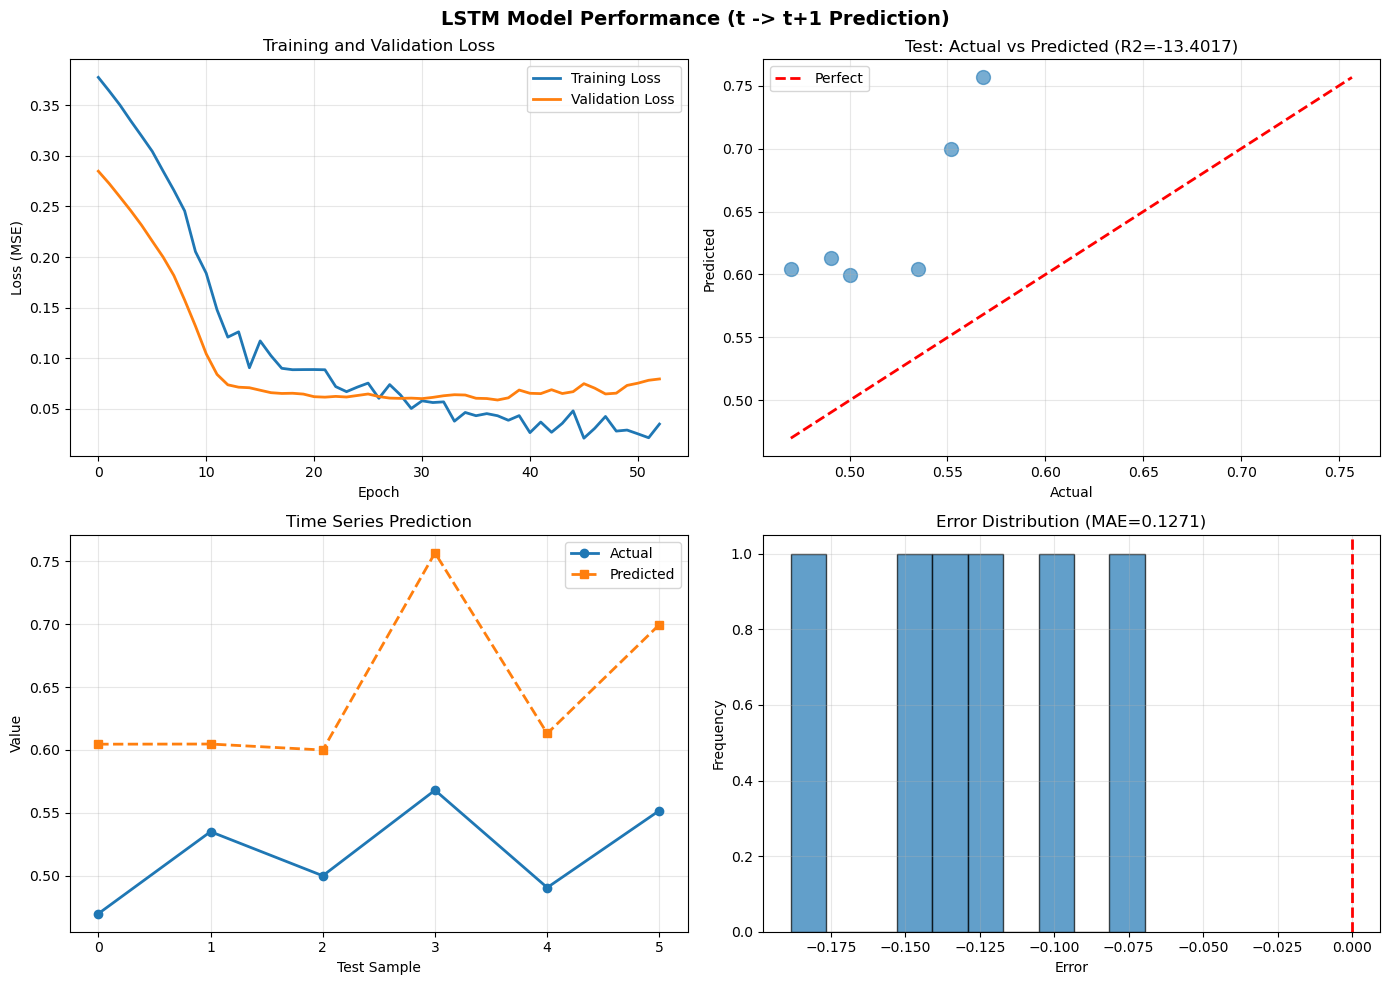

결과 저장: C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\LSTM_t_to_t1_results.xlsx
예측값 저장: C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\LSTM_t_to_t1_predictions.xlsx

모든 작업 완료!


In [5]:
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('LSTM Model Performance (t -> t+1 Prediction)', fontsize=14, fontweight='bold')

# 1. Loss 곡선
ax = axes[0, 0]
ax.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
ax.set_title('Training and Validation Loss')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. 실제 vs 예측
ax = axes[0, 1]
ax.scatter(y_test, y_test_pred, alpha=0.6, s=100)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title(f'Test: Actual vs Predicted (R2={test_r2:.4f})')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. 시계열
ax = axes[1, 0]
indices = np.arange(len(y_test))
ax.plot(indices, y_test, 'o-', label='Actual', linewidth=2)
ax.plot(indices, y_test_pred, 's--', label='Predicted', linewidth=2)
ax.set_xlabel('Test Sample')
ax.set_ylabel('Value')
ax.set_title('Time Series Prediction')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. 오차 분포
ax = axes[1, 1]
residuals = y_test - y_test_pred.flatten()
ax.hist(residuals, bins=10, edgecolor='black', alpha=0.7)
ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Error')
ax.set_ylabel('Frequency')
ax.set_title(f'Error Distribution (MAE={test_mae:.4f})')
ax.grid(True, alpha=0.3)

plt.tight_layout()
output_path = r'C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\LSTM_t_to_t1_performance.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n그래프 저장: {output_path}")
plt.show()

# 결과 저장
results_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE (%)', 'R2'],
    'Training': [f'{train_mse:.6f}', f'{train_rmse:.6f}', f'{train_mae:.6f}', f'{train_mape:.2f}', f'{train_r2:.4f}'],
    'Test': [f'{test_mse:.6f}', f'{test_rmse:.6f}', f'{test_mae:.6f}', f'{test_mape:.2f}', f'{test_r2:.4f}']
})

results_path = r'C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\LSTM_t_to_t1_results.xlsx'
results_df.to_excel(results_path, index=False)
print(f"결과 저장: {results_path}")

# 예측값 비교 저장
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred.flatten(),
    'Error': residuals,
    'Error_Ratio(%)': (np.abs(residuals) / (np.abs(y_test) + 1e-8)) * 100
})

comparison_path = r'C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\LSTM_t_to_t1_predictions.xlsx'
comparison_df.to_excel(comparison_path, index=False)
print(f"예측값 저장: {comparison_path}")

print("\n모든 작업 완료!")


In [4]:
# 성능 평가
print("\n" + "=" * 70)
print("모델 성능 평가")
print("=" * 70)

# 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mape = np.mean(np.abs((y_train - y_train_pred.flatten()) / (np.abs(y_train) + 1e-8))) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred.flatten()) / (np.abs(y_test) + 1e-8))) * 100

# 출력
print("\n[훈련 데이터셋 성능]")
print(f"  MSE:        {train_mse:.6f}")
print(f"  RMSE:       {train_rmse:.6f}")
print(f"  MAE:        {train_mae:.6f}")
print(f"  MAPE:       {train_mape:.2f}%")
print(f"  R2 Score:   {train_r2:.4f}")

print("\n[테스트 데이터셋 성능]")
print(f"  MSE:        {test_mse:.6f}")
print(f"  RMSE:       {test_rmse:.6f}")
print(f"  MAE:        {test_mae:.6f}")
print(f"  MAPE:       {test_mape:.2f}%")
print(f"  R2 Score:   {test_r2:.4f}")

print("\n[모델 평가]")
print(f"  R2 향상도:        {test_r2 - train_r2:.4f}")
overfit = "O" if (test_rmse / train_rmse) > 1.2 else "X"
print(f"  과적합 (예측/학습 > 1.2): {overfit}")

print("=" * 70)



모델 성능 평가

[훈련 데이터셋 성능]
  MSE:        0.041257
  RMSE:       0.203118
  MAE:        0.160514
  MAPE:       128038262.88%
  R2 Score:   0.3916

[테스트 데이터셋 성능]
  MSE:        0.017537
  RMSE:       0.132426
  MAE:        0.127086
  MAPE:       24.41%
  R2 Score:   -13.4017

[모델 평가]
  R2 향상도:        -13.7933
  과적합 (예측/학습 > 1.2): X


In [3]:
# LSTM 모델 학습
print("\n" + "=" * 70)
print("LSTM 모델 구축 및 학습")
print("=" * 70)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 모델 구축
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("\nLSTM 모델 구조:")
model.summary()

# 조기 종료
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# 훈련
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=2,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

print(f"\n훈련 완료! (총 {len(history.history['loss'])} epochs)")

# 예측
y_train_pred = model.predict(X_train, verbose=0)
y_test_pred = model.predict(X_test, verbose=0)

print("예측 완료!")



LSTM 모델 구축 및 학습

LSTM 모델 구조:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,185 (129.63 KB)

 Trainable params: 33,185 (129.63 KB)

 Non-trainable params: 0 (0.00 B)


훈련 완료! (총 53 epochs)
예측 완료!


In [2]:
# 데이터 준비
print("\n" + "=" * 70)
print("데이터 준비")
print("=" * 70)

# 특성 선택 (time_block, log_M_norm, label 제외)
features = df.drop(columns=['time_block', log_m_col, 'label'])
label = df['label']

print(f"입력 특성 수: {features.shape[1]}")
print(f"입력 특성: {list(features.columns)}")

# 특성 스케일링
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# LSTM 입력 형태: (샘플수, 시간스텝, 특성수)
# 현재는 단일 시점이므로 시간스텝 = 1
X = features_scaled.reshape(features_scaled.shape[0], 1, features_scaled.shape[1])
y = label.values

print(f"\nLSTM 입력 형태:")
print(f"  X shape: {X.shape} (샘플, 시간스텝, 특성)")
print(f"  y shape: {y.shape}")
print(f"  라벨 범위: [{y.min():.4f}, {y.max():.4f}]")

# 훈련/테스트 분할 (시계열이므로 shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

print(f"\n데이터 분할:")
print(f"  훈련: {X_train.shape[0]}개")
print(f"  테스트: {X_test.shape[0]}개")



데이터 준비
입력 특성 수: 14
입력 특성: ['D_score', 'final_negative\n_emotion_score', 'L_influence', 'issue_public', 'issue_sensitive', 'issue_trigger', 'issue_entry', 'W_score\n_norm', 'log_M\n_norm', 'Cause', 'Entity', 'Event', 'Impact', 'Reaction']

LSTM 입력 형태:
  X shape: (27, 1, 14) (샘플, 시간스텝, 특성)
  y shape: (27,)
  라벨 범위: [0.0000, 1.0000]

데이터 분할:
  훈련: 21개
  테스트: 6개


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드
print("=" * 70)
print("LSTM: t시점 특성 -> t+1시점 log_M_norm 예측")
print("=" * 70)

df = pd.read_excel(r"C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\merged_df_info1.xlsx")
print(f"\n데이터 로드: {df.shape[0]}개 샘플, {df.shape[1]}개 컬럼")

# 열 이름 정리
df = df.rename(columns={
    'issue_\n대중이슈': 'issue_public',
    'issue_\n민감이슈': 'issue_sensitive',
    'issue_\n불쏘시개이슈': 'issue_trigger',
    'issue_\n진입이슈': 'issue_entry'
})

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# log_M_norm 컬럼 찾기
log_m_col = [c for c in df.columns if 'log_M' in c and 'norm' in c][0]
print(f"라벨 컬럼: {log_m_col}")

# 라벨 생성: t시점의 특성으로 t+1시점의 log_M_norm 예측
df['label'] = df[log_m_col].shift(-1)
df = df[:-1].reset_index(drop=True)

print(f"\n예측 구조:")
print(f"  입력: t시점의 모든 특성")
print(f"  출력: t+1시점의 log_M_norm")
print(f"  샘플 수: {len(df)}")


LSTM: t시점 특성 -> t+1시점 log_M_norm 예측

데이터 로드: 28개 샘플, 17개 컬럼
라벨 컬럼: delta_log_M
_norm

예측 구조:
  입력: t시점의 모든 특성
  출력: t+1시점의 log_M_norm
  샘플 수: 27
